### Question 1


Generate your dataset using the following lines of code

```python
from sklearn.datasets import make_classification
X, y = make_classification(
n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2, class_sep=0.5)

# For plotting
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)
```

a) Show the usage of *your decision tree* on the above dataset. The first 70% of the data should be used for training purposes and the remaining 30% for test purposes. Show the accuracy, per-class precision and recall of the decision tree you implemented on the test dataset. **[0.5 mark]**

b) Use 5 fold cross-validation on the dataset. Using nested cross-validation find the optimum depth of the tree. **[1 mark]**

?(0 <= 0.2043565741471512)
  Y:     ?(0 <= -0.17186200022530262)
      Y:         ?(1 <= 1.436385670254486)
          Y:             Predict: 0
          N:             Predict: 1
      N:         ?(1 <= 1.171228953508551)
          Y:             Predict: 1
          N:             Predict: 0
  N:     Predict: 1
Accuracy:  60.0
Precision for class 1:  60.0
Recall for class 1:  100.0
Precision for class 0:  0.0
Recall for class 0:  0.0


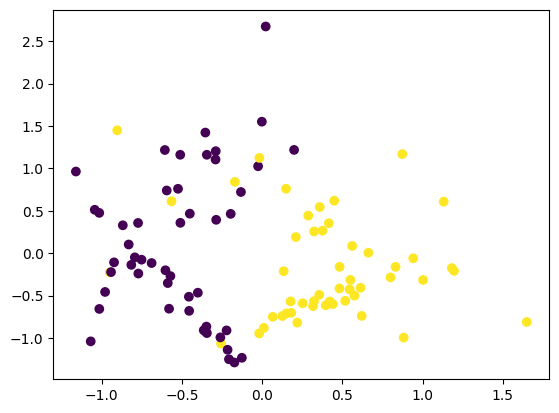

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tree.base import DecisionTree
from metrics import *
from sklearn.datasets import make_classification

np.random.seed(42)

# Code given in the question
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2, class_sep=0.5)

# For plotting
plt.scatter(X[:, 0], X[:, 1], c=y)

# Write the code for Q2 a) and b) below. Show your results.

# Question 1a

X_df = pd.DataFrame(X, columns=["X1", "X2"])
y_df = pd.Series(y, name="y")

# random data split train = 70% and test = 30%
train_size = int(0.7 * len(X))
random_indices = np.random.permutation(len(X))
train_indices = random_indices[:train_size]
test_indices = random_indices[train_size:]

train_X = X_df.iloc[train_indices]
train_y = y_df.iloc[train_indices]
test_X = X_df.iloc[test_indices]
test_y = y_df.iloc[test_indices]

tree = DecisionTree(criterion="information_gain", max_depth=3)
tree.fit(train_X, train_y)
tree.plot()

y_hat = tree.predict(test_X)
print("Accuracy: ", accuracy(y_hat, test_y))
# for class 1

print("Precision for class 1: ", precision(y_hat, test_y, 1))
print("Recall for class 1: ", recall(y_hat, test_y, 1))

# for class 0
print("Precision for class 0: ", precision(y_hat, test_y, 0))
print("Recall for class 0: ", recall(y_hat, test_y, 0))

[2, 3, 4, 5, 6, 7]
[np.float64(47.0), np.float64(47.0), np.float64(47.0), np.float64(47.0), np.float64(46.0), np.float64(46.0)]


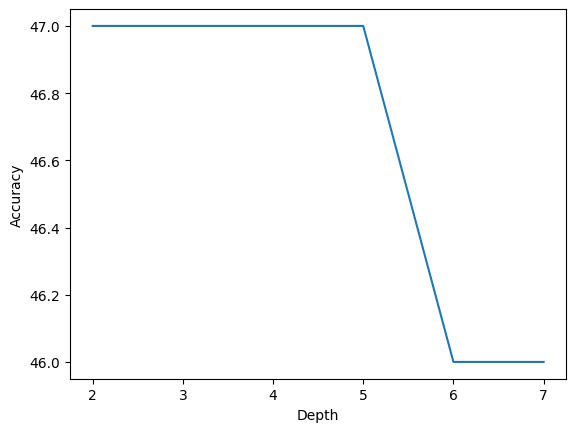

In [3]:
# Question 1b

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2, class_sep=0.5)

# shuffle once before cross-validation
indices = np.arange(len(X))
np.random.shuffle(indices)
X, y = X[indices], y[indices]

k = 5

accuracy_metrics = []
possible_depths = [2, 3, 4, 5, 6, 7]

test_size = len(X) // k

for depth in possible_depths:
    fold_accuracy_metrics = []
    for fold in range(k):
        test_index_start = fold * test_size
        test_index_end = test_index_start + test_size
        test_X = X[test_index_start:test_index_end]
        test_y = y[test_index_start:test_index_end]

        train_X = np.concatenate(
            [X[:test_index_start], X[test_index_end:]], axis=0)
        train_y = np.concatenate(
            [y[:test_index_start], y[test_index_end:]], axis=0)

        # numpy to pandas
        train_X = pd.DataFrame(train_X, columns=["X1", "X2"])
        train_y = pd.Series(train_y, name="y")
        test_X = pd.DataFrame(test_X, columns=["X1", "X2"])
        test_y = pd.Series(test_y, name="y")

        tree = DecisionTree(criterion="information_gain", max_depth=depth)
        tree.fit(train_X, train_y)
        # tree.plot()
        y_hat = tree.predict(test_X)
        fold_accuracy_metrics.append(accuracy(y_hat, test_y))
    # average the accuracy metrics
    accuracy_metrics.append(np.mean(fold_accuracy_metrics))

print(possible_depths)
print(accuracy_metrics)

# plot the accuracy metrics
plt.plot(possible_depths, accuracy_metrics)
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.show()